In [1]:
from astropy.io import fits
import pandas as pd
import scipy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as sts

**Defining global variables needed for plotting**

In [2]:
ndims = 5 #number of parameters in the 5-d astrometric space
labels = ['RAdeg (deg)','DEdeg (deg)','Plx (mas)','pmRA (mas/yr)','pmDE (mas/yr)'] #used for axis labels
key_labels = ['Prob <= 0.8','Prob > 0.8'] #used for legend
histogram_labels = ['Plx (mas)','pmRA (mas/yr)','pmDE (mas/yr)','Gmag (mag)','BP-RP (mag)']
histogram_var = ['Plx','pmRA','pmDE','Gmag','BP-RP']
RAlegend_labels = ['RA > Mean', 'RA < Mean']
DElegend_labels = ['DE > Mean', 'DE < Mean']

**Defining functions needed for tasks**

In [3]:
def create_scplotmatrix(clusternum,stars_main,large_clusters,Star_clusters):
    '''
    This function is used to create a matrix of scatter plots and histograms to show the variation of the parameters in 
    5-d astromertric parametric space (RAdeg, DEdeg, Plx, pmRA and pmDE).
    
    Function Parameters:
    ---------------------
    1. clusternum : Position of cluster who's matrix is being created in the dataframe of star clusters with more than 1000 stars
    2. stars_main : Dataframe containing information of individual stars
    3. large_clusters: Dataframe of star clusters with more than 1000 stars
    4. star_clusters: Dataframe of stars, here stars belonging to one of the 4 clusters being randomly sampled
    
    '''
    Cluster_name = large_clusters.iloc[clusternum-1]['Name']  #Dataframe corresponding to cluster at a particular location  
    Starsubcluster_lowprob = Star_clusters.loc[stars_main['Prob']<=0.8]
    Starsubcluster_highprob = Starclusters.loc[stars_main['Prob']>0.8] 
    Cluster_lowprobdata = Starsubcluster_lowprob.loc[Starsubcluster_lowprob['Name'] == Cluster_name]
    Cluster_highprobdata = Starsubcluster_highprob.loc[Starsubcluster_highprob['Name'] == Cluster_name]
    #Extracting relevant data into numpy arrays to create scatter plots/histograms
    Cluster_lowprobarray = np.column_stack((Cluster_lowprobdata.RAdeg,Cluster_lowprobdata.DEdeg,Cluster_lowprobdata.Plx,Cluster_lowprobdata.pmRA,Cluster_lowprobdata.pmDE))
    Cluster_highprobarray = np.column_stack((Cluster_highprobdata.RAdeg,Cluster_highprobdata.DEdeg,Cluster_highprobdata.Plx,Cluster_highprobdata.pmRA,Cluster_highprobdata.pmDE))
    #Below 2 lines for setting x tick size are from: https://stackoverflow.com/questions/38369188/set-size-of-ticks-in-all-subplots
    matplotlib.rc('xtick', labelsize=8) 
    matplotlib.rc('ytick', labelsize=8) 
    #Below is copied from extras of Prof. Uttley's github and modified
    fig, axes = plt.subplots(ndims,ndims,figsize=(10,10))
    fig.subplots_adjust(wspace=0.5,hspace=0.4)
    for i in range(ndims): ## y dimension
        for j in range(ndims): ## x dimension
            if i == j:
                axes[i,j].hist(Cluster_lowprobarray[:,i], bins=20,alpha=0.5)
                axes[i,j].hist(Cluster_highprobarray[:,i], bins=20,alpha=0.5)
            elif i > j:
                axes[i,j].scatter(Cluster_lowprobarray[:,j],Cluster_lowprobarray[:,i],s=1)
                axes[i,j].scatter(Cluster_highprobarray[:,j],Cluster_highprobarray[:,i],s=1)
            else:
                axes[i,j].axis('off')
            if j == 0:
                if i == j:
                    axes[i,j].set_ylabel('Counts',fontsize=11)
                else:
                    axes[i,j].set_ylabel(labels[i],fontsize=11)
            if i == 4:
                axes[i,j].set_xlabel(labels[j],fontsize=11)

    fig.legend(labels=key_labels)
    plt.suptitle('Plots for '+Cluster_name)            
    plt.show()

In [4]:
def plot_histograms(hiprobstars, clustername):
    '''
    This function is used to plot histograms of p-values for the RA/DE-selected subsamples of a particular cluster. P-values are
    calculated for Plx, pmRA, pmDE, Gmag and BP-RP.
    
    Parameters:
    ------------
    1. hiprobstars- Dataframe containing stars with Prob > 0.8
    2. clustername- Name of cluster whose P-values are to be plotted
    
    '''
    Cluster = hiprobstars[hiprobstars['Name'] == clustername] #dataframe of stars belonging to the desired cluster 
    #Creating RA and DE selected subsamples
    RAsubsample1 = Cluster[Cluster['RAdeg'] > Cluster['RAdeg'].mean()]
    RAsubsample2 = Cluster[Cluster['RAdeg'] < Cluster['RAdeg'].mean()]
    DEsubsample1 = Cluster[Cluster['DEdeg'] > Cluster['DEdeg'].mean()]
    DEsubsample2 = Cluster[Cluster['DEdeg'] < Cluster['DEdeg'].mean()]
    
    RAsample1_data = np.column_stack((RAsubsample1['Plx'],RAsubsample1['pmRA'],RAsubsample1['pmDE'],RAsubsample1['Gmag'],RAsubsample1['BP-RP']))
    RAsample2_data = np.column_stack((RAsubsample2['Plx'],RAsubsample2['pmRA'],RAsubsample2['pmDE'],RAsubsample2['Gmag'],RAsubsample2['BP-RP']))

    matplotlib.rc('xtick', labelsize=8) 
    matplotlib.rc('ytick', labelsize=8) 
    fig, axes = plt.subplots(1,ndims,figsize=(20,5))
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    
    for i in range(ndims): 
        axes[i].hist(RAsample1_data[:,i],bins=20,alpha=0.5,color='orange')
        axes[i].hist(RAsample2_data[:,i],bins=20,alpha=0.5,color='blue')
        axes[i].set_xlabel(histogram_labels[i])
        axes[i].set_ylabel('Counts')
        
    fig.legend(RAlegend_labels,loc='upper right')
    plt.suptitle('Histogram plots for RA-selected subsamples of '+clustername)
    plt.show()    
    
    DEsample1_data = np.column_stack((DEsubsample1['Plx'],DEsubsample1['pmRA'],DEsubsample1['pmDE'],DEsubsample1['Gmag'],DEsubsample1['BP-RP']))
    DEsample2_data = np.column_stack((DEsubsample2['Plx'],DEsubsample2['pmRA'],DEsubsample2['pmDE'],DEsubsample2['Gmag'],DEsubsample2['BP-RP']))
    fig, axes = plt.subplots(1,ndims,figsize=(20,5))
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    
    for i in range(ndims): 
        axes[i].hist(DEsample1_data[:,i],bins=20,alpha=0.5,color='purple')
        axes[i].hist(DEsample2_data[:,i],bins=20,alpha=0.5,color='red')
        axes[i].set_xlabel(histogram_labels[i])
        axes[i].set_ylabel('Counts')
        
    fig.legend(DElegend_labels,loc='upper right')
    plt.suptitle('Histogram plots for DE-selected subsamples of '+clustername)
    plt.show()

In [5]:
def Ttest_specific(hiprobstars,clustername):
    '''
    This function carries out 2 sample t-tests of RA and DE-selected subsamples of a particular cluster and prints the T-statistic and 
    p-value. The t-tests are carried out for the parameters Plx, pmRA, pmDE, Gmag and BP-RP and the cluster is identified based
    on the name passed as a function argument. The required RA and DE selected subsamples are then created based on the mean 
    value of RAdeg and DEdeg.
    
    Parameters:
    ------------
    1. hiprobstars- Dataframe containing stars with Prob > 0.8
    2. clustername- Name of cluster whose P-values are to be plotted
    '''
    
    Cluster = hiprobstars[hiprobstars['Name'] == clustername] 
    RAsubsample1 = Cluster[Cluster['RAdeg'] > Cluster['RAdeg'].mean()]
    RAsubsample2 = Cluster[Cluster['RAdeg'] < Cluster['RAdeg'].mean()]
    DEsubsample1 = Cluster[Cluster['DEdeg'] > Cluster['DEdeg'].mean()]
    DEsubsample2 = Cluster[Cluster['DEdeg'] < Cluster['DEdeg'].mean()]
    
    print('T statistic and p-value for RA-selected subsamples, '+clustername)
    for i in range(len(histogram_labels)):
        #We assume samples have same variance
        tstat, pval = sts.ttest_ind(RAsubsample1[histogram_var[i]], RAsubsample2[histogram_var[i]], equal_var = True) 
        #String formatting to display upto 4 significant figures (does not work perfectly but is suitable for this task) 
        #https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
        tstat = float("%.4g"%tstat) 
        pval = float("%.4g"%pval)
        print('T = ', tstat,'and p-value = ',pval,' for the parameter '+histogram_var[i])        
    
    print('\n')
    
    print('T statistic and p-value for DE-selected subsamples, '+clustername)
    for i in range(len(histogram_labels)):
        tstat, pval = sts.ttest_ind(DEsubsample1[histogram_var[i]], DEsubsample2[histogram_var[i]], equal_var = True)
        tstat = float("%.4g"%tstat)
        pval = float("%.4g"%pval)
        print('T = ', tstat,'and p-value = ',pval,' for the parameter '+histogram_var[i])        
    
    print('\n')
    

In [6]:
def Ttest_arbitrary(Constrained_starclusters, largeclusters_hiprob, clusternum):
    '''
    Executes the 2 sample t-test for an arbitrary star cluster. The cluster is identified based on its position in the 
    dataframe of clusters with more than 200 stars, Prob > 0.8 and with the constraint of the standard deviations of RA and DE 
    < 0.1. The required RA and DE selected subsamples are then created based on the mean value of RAdeg and DEdeg. 
    P-values from t-tests are added to global arrays used to store them.
    
    Parameters:
    ------------
    1. Constrained_starclusters: Dataframe of stars, here filtered for clusters with more than 200 stars, Prob > 0.8, RA and DE
    with std < 0.1
    2. largeclusters_hiprob : Dataframe of starclusters with the above filters
    3. clusternum : Position of a cluster in the largeclusters_hiprob dataframe, used to iterate over all clusters in order to
    obtain all the required p-values
    '''
    
    Cluster_name = largeclusters_hiprob.iloc[clusternum]['Name']
    Req_cluster = Constrained_starclusters[Constrained_starclusters['Name'] == Cluster_name]
    RA_Sample1 = Req_cluster[Req_cluster['RAdeg'] > Req_cluster['RAdeg'].mean()]
    RA_Sample2 = Req_cluster[Req_cluster['RAdeg'] < Req_cluster['RAdeg'].mean()]
    DE_Sample1 = Req_cluster[Req_cluster['DEdeg'] > Req_cluster['DEdeg'].mean()]
    DE_Sample2 = Req_cluster[Req_cluster['DEdeg'] < Req_cluster['DEdeg'].mean()]

    for i in range(len(histogram_var)):
        tstat1, pval1 = sts.ttest_ind(RA_Sample1[histogram_var[i]], RA_Sample2[histogram_var[i]], equal_var = True)
        Pvals_RA[clusternum][i] = pval1
        tstat2, pval2 = sts.ttest_ind(DE_Sample1[histogram_var[i]], DE_Sample2[histogram_var[i]], equal_var = True)
        Pvals_DE[clusternum][i] = pval2
    

In [7]:
def plot_pvals(Pvals,title,colour):
    '''
    Function to plot histograms of p-values. Here, the p-values are those of 2 sample t-tests of RA and DE selected subsamples
    of specific clusters (more than 200 stars, Prob > 0.8, std of RA and DE < 0.1).
    
    Parameters:
    -----------
    1. Pvals : numpy.ndarray 
               Contains the p-values for each cluster, with each column corresponding to a parameter 
               among Plx, pmRA, pmDE, Gmag and BP-RP
    2. title : string
               Title of the figure
    3. colour : string
                Colour of the histogram
    '''
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 
    fig, axes = plt.subplots(1,ndims,figsize=(20,5))
    fig.subplots_adjust(wspace=0.5,hspace=0.6)
    for i in range(ndims):
        axes[i].hist(Pvals[:,i],bins=20,alpha=0.5,color=colour)
        axes[i].set_xlabel(histogram_labels[i])
        axes[i].set_ylabel('Counts')
    
    fig.suptitle(title)
    plt.show()

**Initial Setup- Loading the data from the given FITS file**

In [8]:
#copied from assignment
dr3stars = fits.open(r'C:\Users\ragha\Downloads\gaiadr3_cluster_stars.fits')
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: C:\Users\ragha\Downloads\gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   
ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; 

**Assignment Task 1**

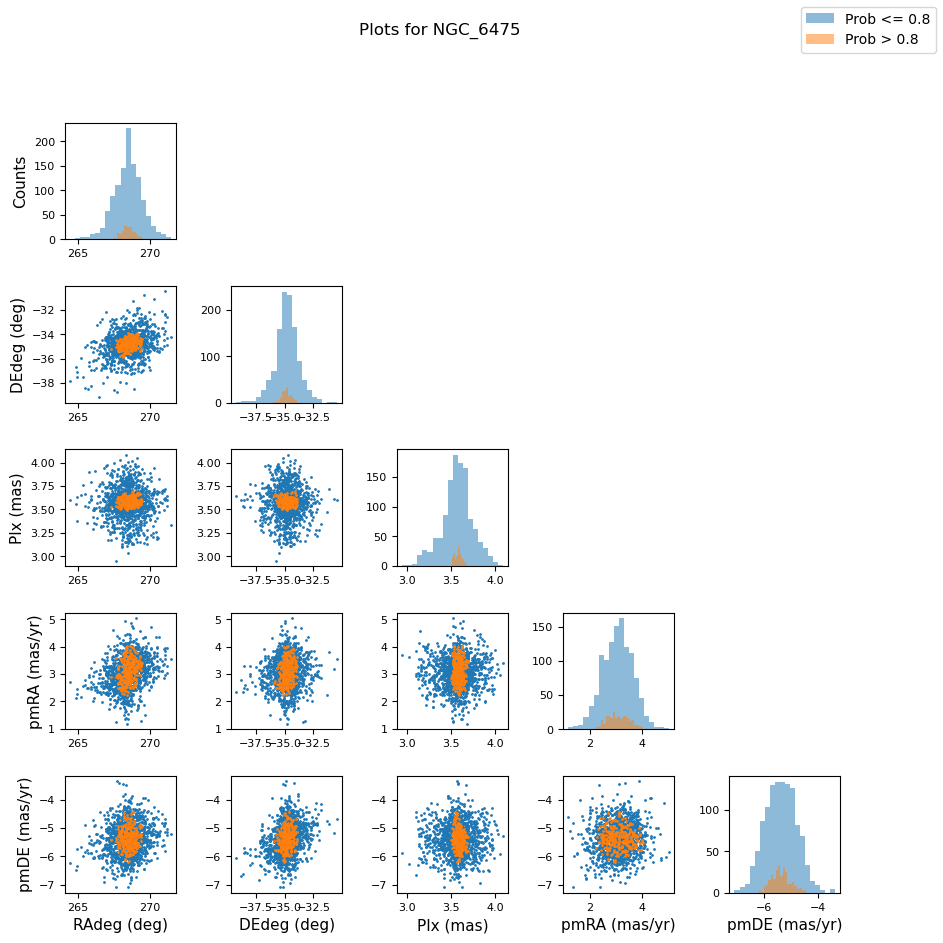

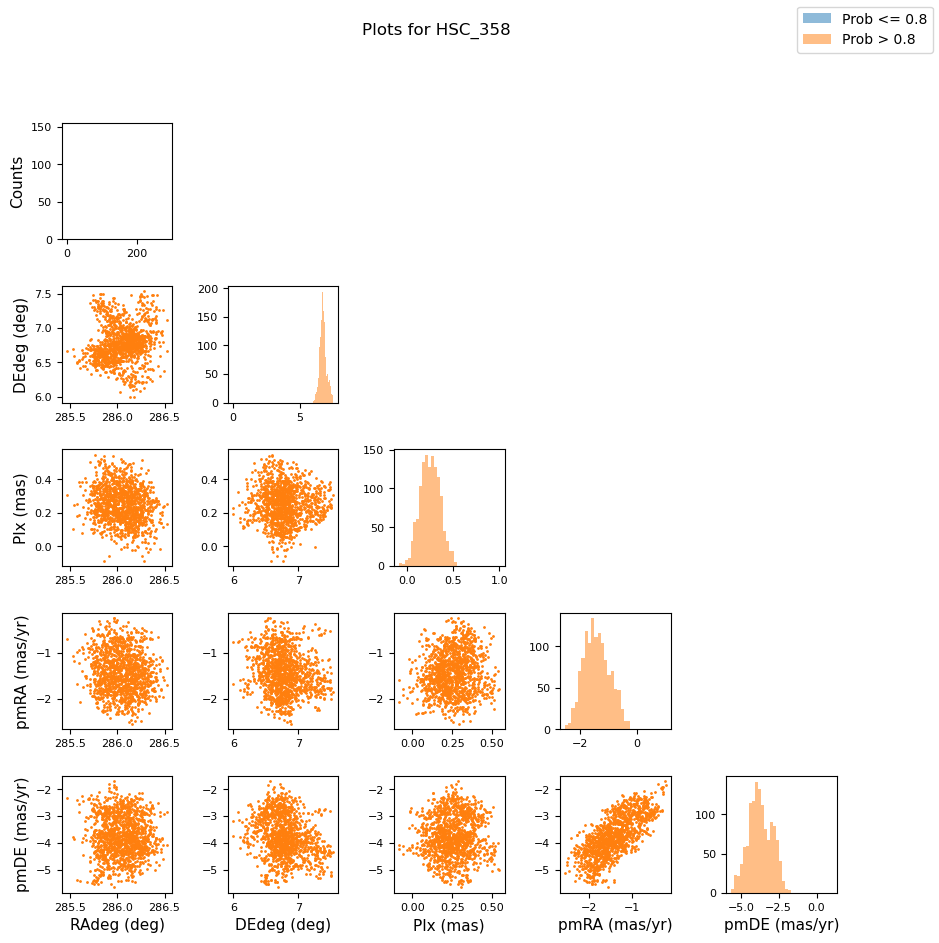

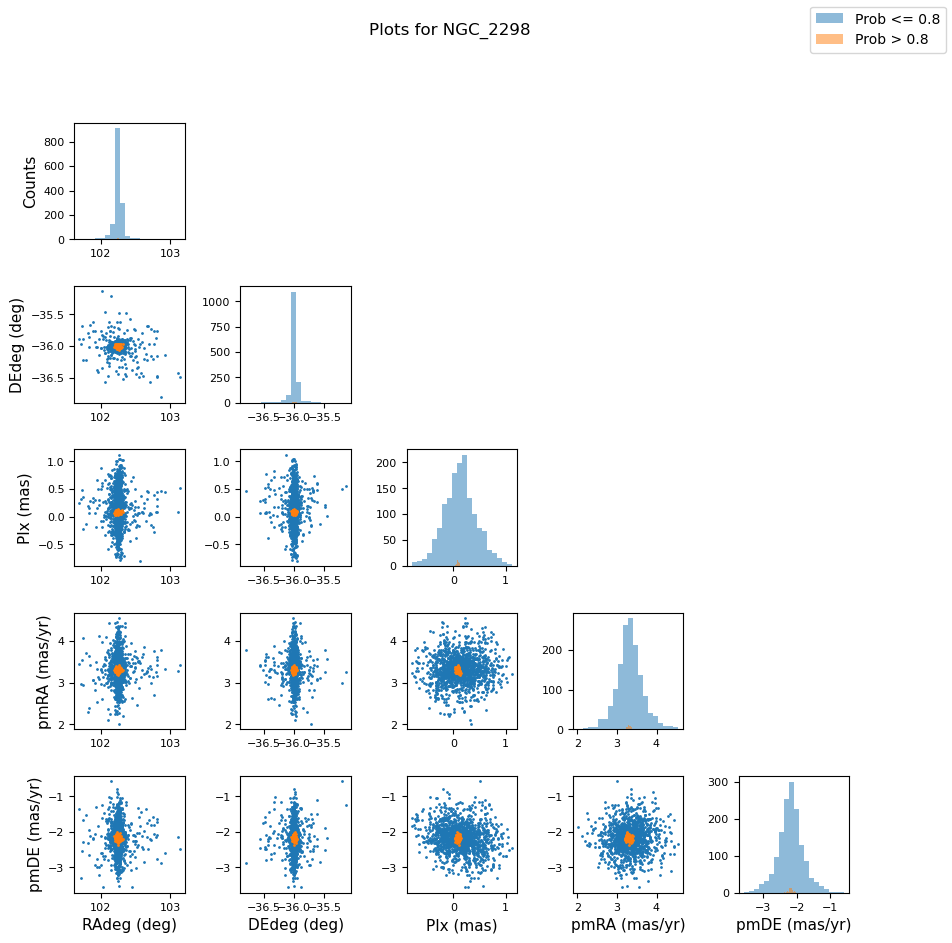

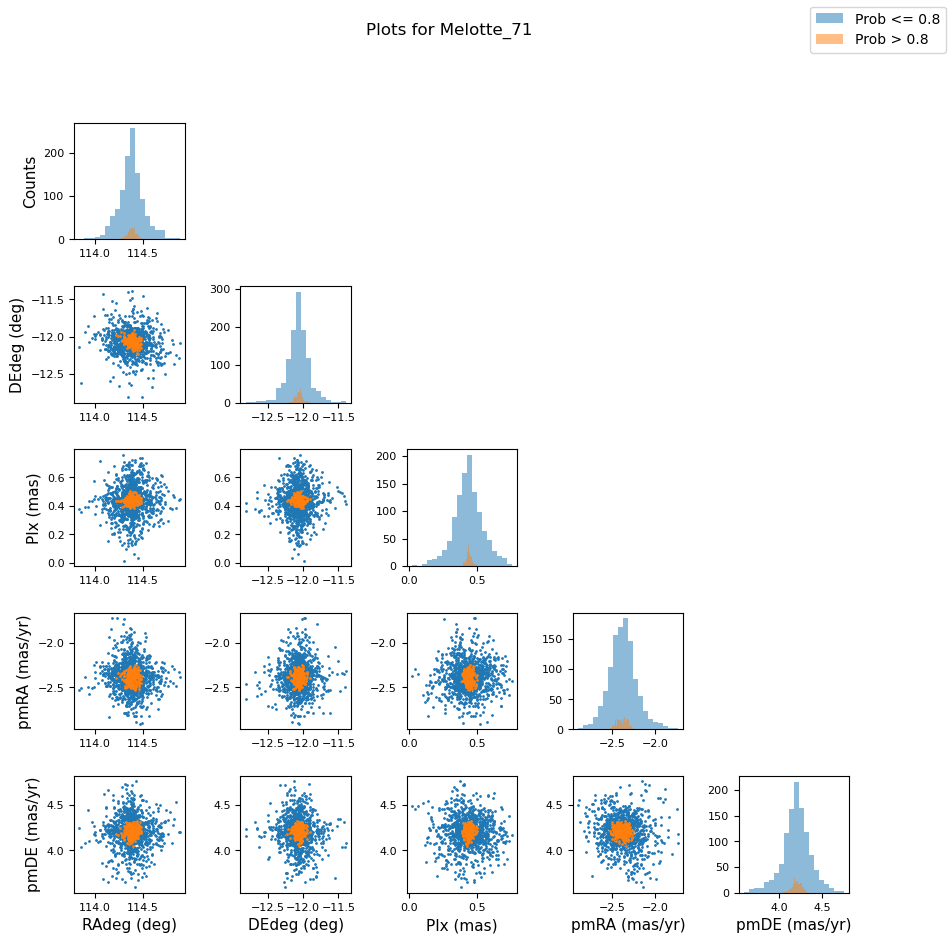

In [9]:
clcounts = stars.groupby(['Name']).size().reset_index(name='count')
largeclusters = clcounts.loc[clcounts['count']>1000].sample(n=4)  #randomly selects 4 star clusters with more than 1000 stars 
Starclusters = stars.loc[stars['Name'].isin(largeclusters['Name'])] #extracting the individual stars belonging to these clusters
for i in range(4):
    create_scplotmatrix(i,stars,largeclusters,Starclusters)

**Comments on Task 1:**
<br>
Here I will be discussing the clusters Trumpler_5, NGC_1245, NGC_5897 and IC_4651. Trumpler_5 and IC_4651 appear to be uniformly distributed across all parameters, with roughly spherical shapes in all scatterplots. The 2 NGC clusters on the other hand have a 'vertical' extension in some plots, especially the variation of parallax with RA and DE. This means that the parallax is not uniform with position in the celestial sphere, and there is some connection with the distance of the cluster from the source. Trumpler_5 and IC_4651 are likely far away and/or gravitationally well bound leading to this uniformity across the celestial coordinates. This is also supported by the larger number of high probability stars (>0.8) in the two clusters. One common feature among all these clusters is that they are large, as indicated by the fact that they all have more low Prob stars than high Prob. It is important to note that the relative spread and amount of high and low probability stars is dependent on the clustering analysis algorithm of Gaia DR3.

**Assignment Task 2**

In [10]:
#copied from assignment
stars_hiprob = stars[stars.Prob > 0.8]
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='count')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index() 
clusters_hiprob['sd_RAdeg'] = clusters_sd_hiprob['RAdeg']
clusters_hiprob['sd_DEdeg'] = clusters_sd_hiprob['DEdeg']

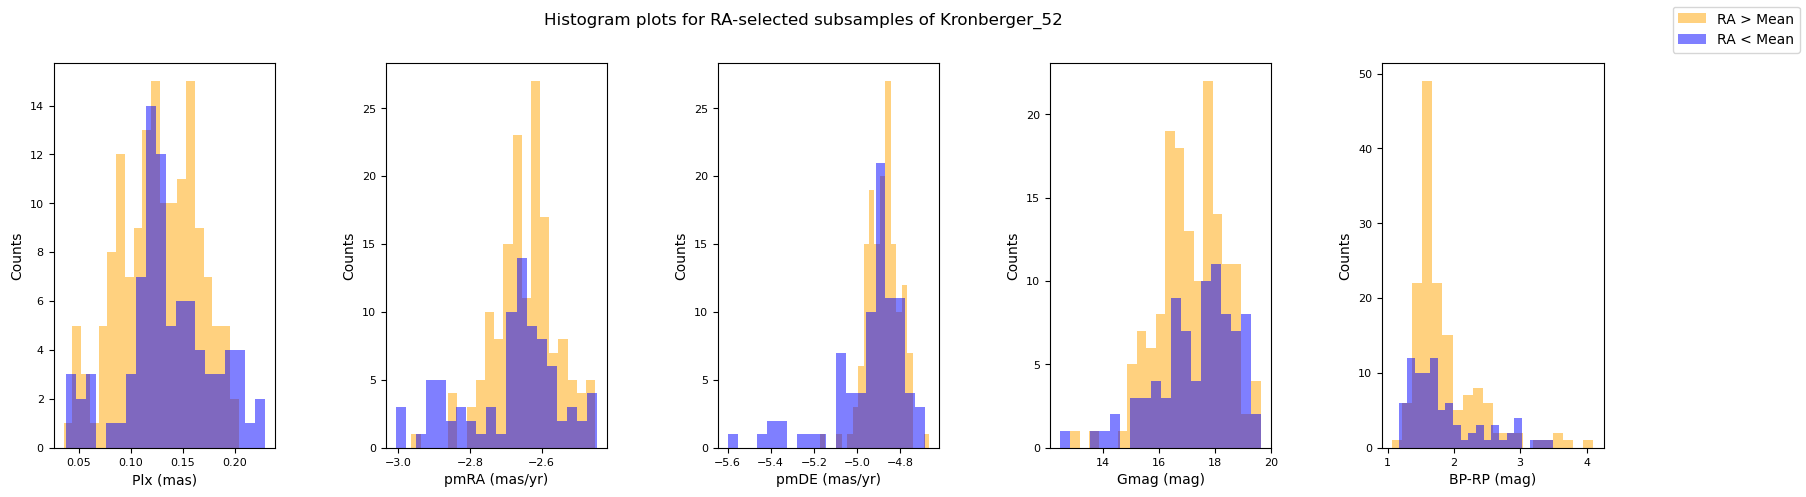

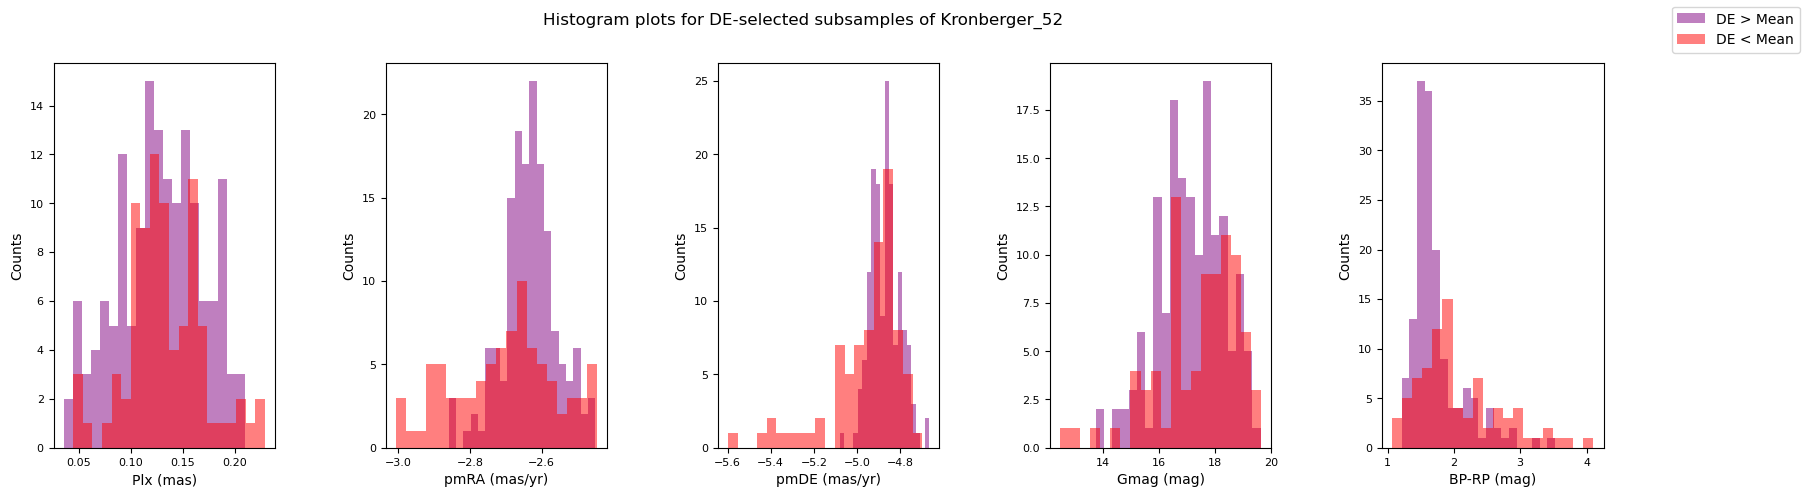

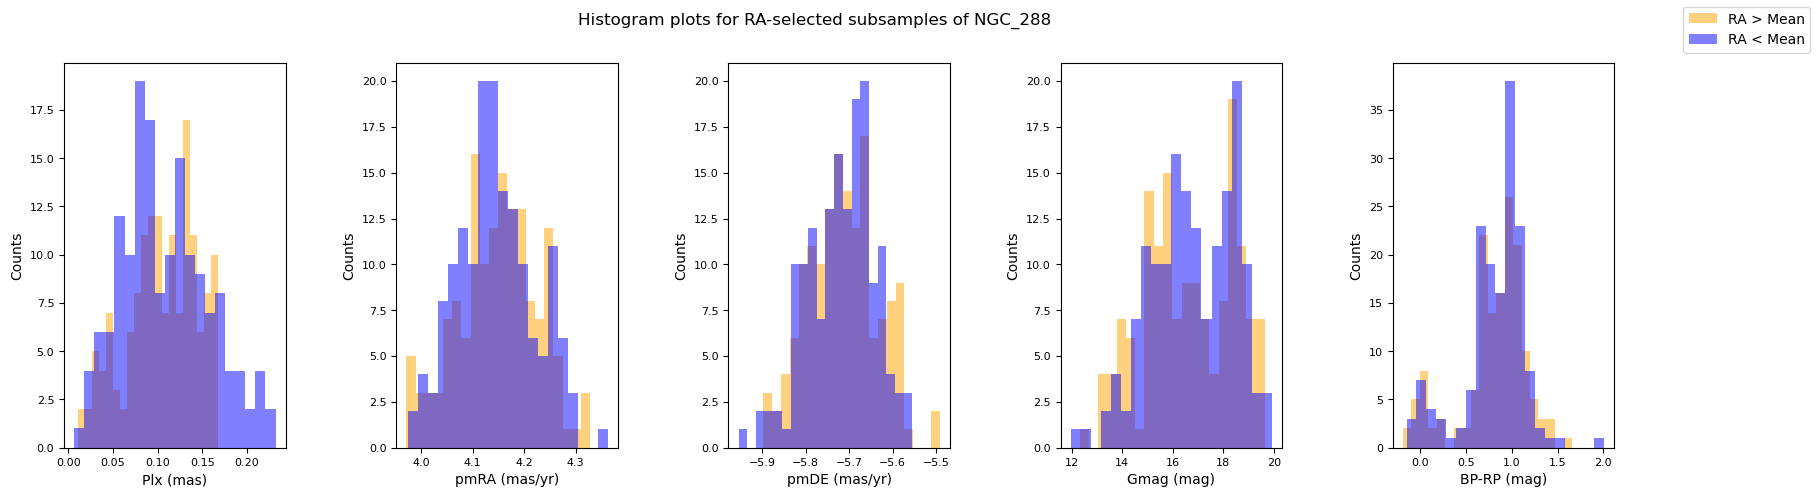

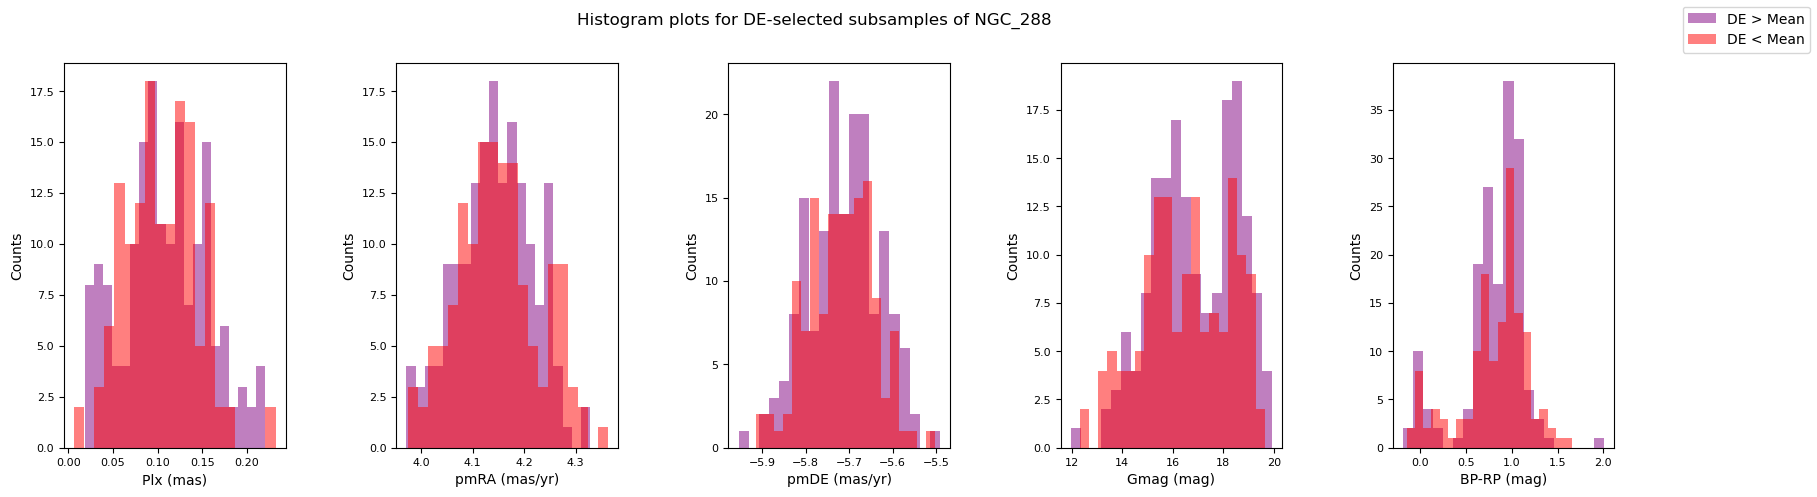

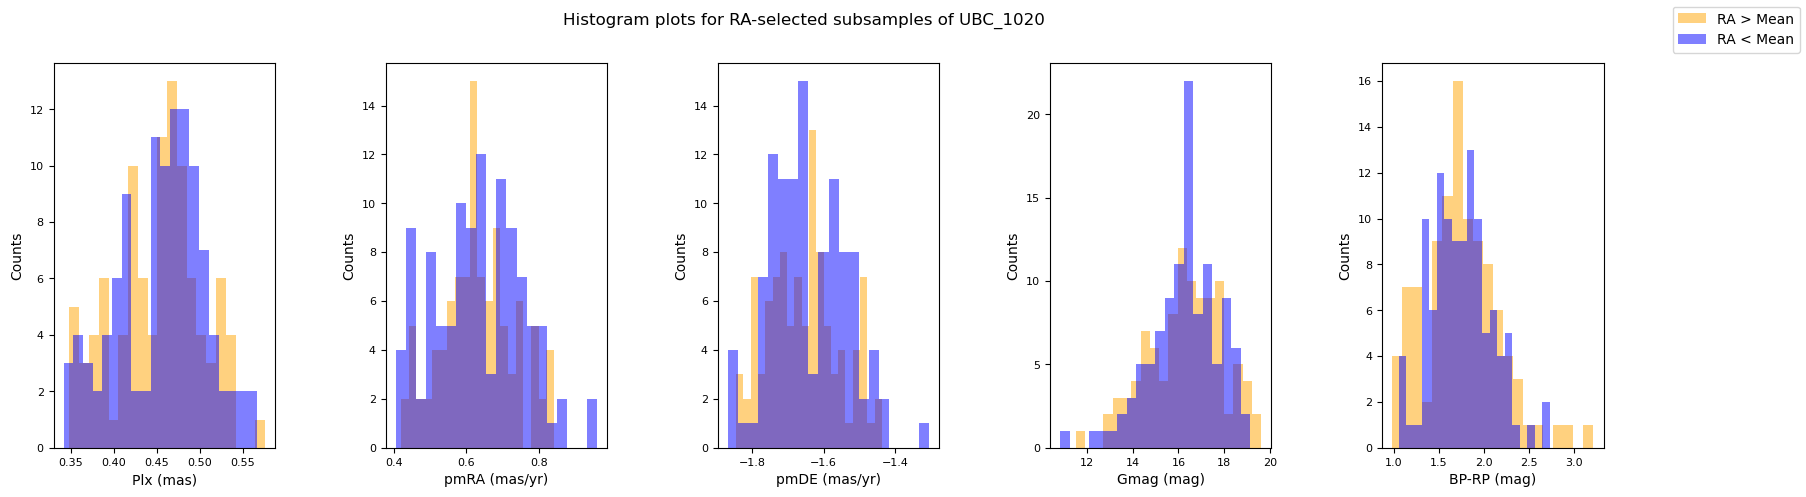

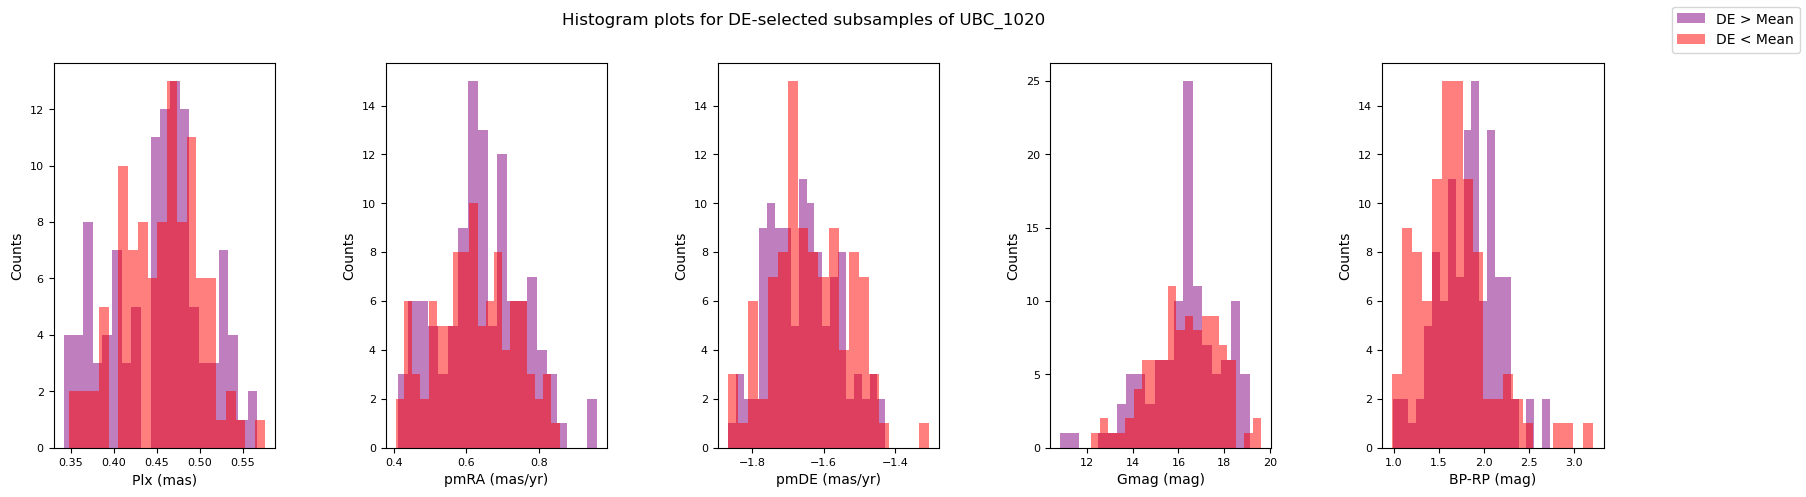

In [11]:
#Filtering the dataframe for clusters with more than 200 stars and standard deviation of RA and DE < 0.1
largeclusters_hiprob = clusters_hiprob[(clusters_hiprob['count'] > 200) & (clusters_hiprob['sd_RAdeg'] < 0.1) & (clusters_hiprob['sd_DEdeg'] < 0.1)]
plot_histograms(stars_hiprob,'Kronberger_52') #13th cluster in largeclusters_hiprob
plot_histograms(stars_hiprob,'NGC_288') #29th cluster
plot_histograms(stars_hiprob,'UBC_1020') #83rd cluster

In [12]:
Ttest_specific(stars_hiprob,'Kronberger_52') 

T statistic and p-value for RA-selected subsamples, Kronberger_52
T =  -1.682 and p-value =  0.09394  for the parameter Plx
T =  2.853 and p-value =  0.004722  for the parameter pmRA
T =  3.896 and p-value =  0.0001275  for the parameter pmDE
T =  -0.9826 and p-value =  0.3268  for the parameter Gmag
T =  -0.03485 and p-value =  0.9722  for the parameter BP-RP


T statistic and p-value for DE-selected subsamples, Kronberger_52
T =  -0.8308 and p-value =  0.4069  for the parameter Plx
T =  4.923 and p-value =  1.603e-06  for the parameter pmRA
T =  5.773 and p-value =  2.454e-08  for the parameter pmDE
T =  -1.485 and p-value =  0.1389  for the parameter Gmag
T =  -5.013 and p-value =  1.056e-06  for the parameter BP-RP




**Comments on task 2 b. :** 
<br>
For remaining tasks I am considering a significance level α of 0.03 (between 2 and 3 σ). In my opinion, this is an acceptable significance to take as this is quite basic, preliminary analysis. I would take a 3 or 5σ if I were to research these clusters further. We see than the null hypothesis that the population of stars in one subsample of Kronberger_52 is the same as the other sample is rejected for the proper motion parameters in case of RA and DE, and the BP-RP is also rejected for DE subsamples. This means that there is some spatial dependence of the proper motion (and the continuum spectrum) of the stars in the cluster, which physically makes sense as stars further from the mean are likely to be less gravitationally bound than the central ones, hence having a more independent proper motion.  

In [13]:
Ttest_specific(stars_hiprob,'NGC_288')
Ttest_specific(stars_hiprob,'UBC_1020')

T statistic and p-value for RA-selected subsamples, NGC_288
T =  -0.9953 and p-value =  0.3204  for the parameter Plx
T =  0.455 and p-value =  0.6494  for the parameter pmRA
T =  0.5926 and p-value =  0.5539  for the parameter pmDE
T =  -0.8894 and p-value =  0.3745  for the parameter Gmag
T =  -0.108 and p-value =  0.9141  for the parameter BP-RP


T statistic and p-value for DE-selected subsamples, NGC_288
T =  0.6745 and p-value =  0.5005  for the parameter Plx
T =  -0.6872 and p-value =  0.4925  for the parameter pmRA
T =  0.521 and p-value =  0.6028  for the parameter pmDE
T =  1.999 and p-value =  0.04644  for the parameter Gmag
T =  -0.1094 and p-value =  0.913  for the parameter BP-RP


T statistic and p-value for RA-selected subsamples, UBC_1020
T =  -0.6231 and p-value =  0.5339  for the parameter Plx
T =  -0.1114 and p-value =  0.9114  for the parameter pmRA
T =  -0.8963 and p-value =  0.3711  for the parameter pmDE
T =  0.2023 and p-value =  0.8399  for the parameter Gmag


**Comments on task 2 c.**
<br>
Taking the same significance level, we see that NGC_288 and UBC_1020 have almost no spatial dependence for any of the parameters unlike Kronberger_52 (with the exception of BP-RP for DE subsamples of UBC_1020). This does not really say much however, as we are comparing p-values across 3 clusters which is a very small sample size. However, we can make the observation from the above histograms that the parameters are more normally distributed for NGC_288 and UBC_1020, while the histograms of Kronberger_52 are more narrow. So the 2 sample t-test may not be an appropriate test for understanding the spatial dependence of parameters of Kronberger_52.

**Assignment task 3**

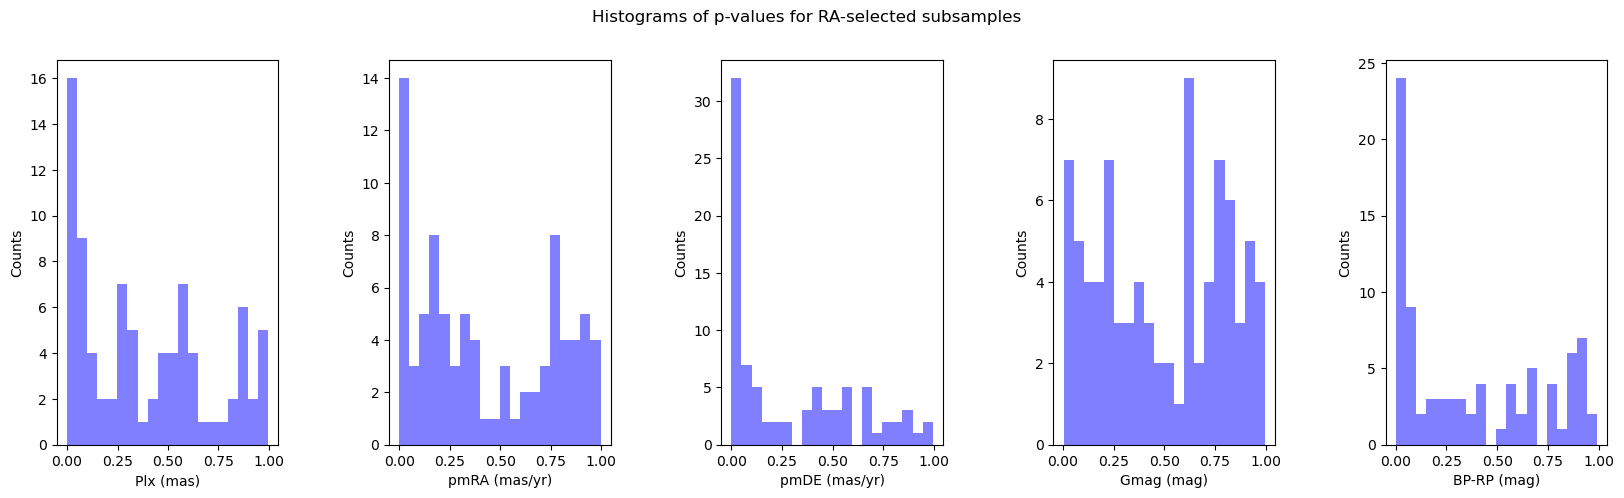

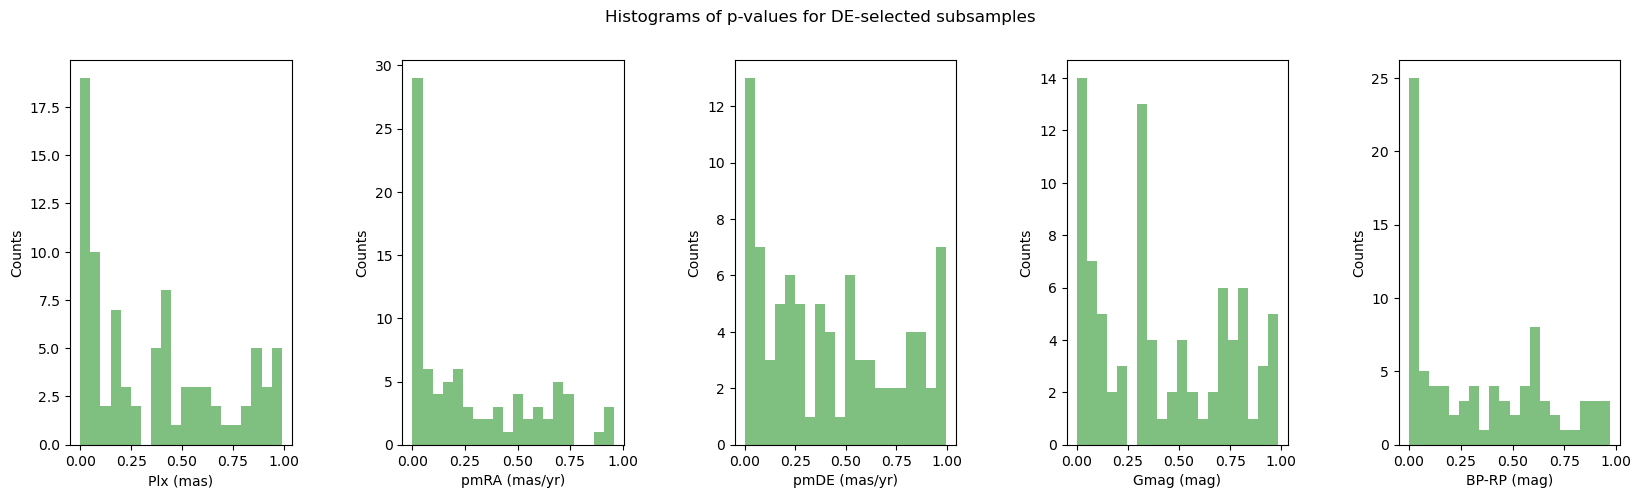

In [14]:
Constrained_starclusters = stars_hiprob.loc[stars_hiprob['Name'].isin(largeclusters_hiprob['Name'])]
#These arrays are used to store the p-values for all clusters, with each column corresponding to p-value of 
#a parameter among Plx, pmRA, pmDE, Gmag and BP-RP
Pvals_RA = np.zeros((len(largeclusters_hiprob),len(histogram_var)))
Pvals_DE = np.zeros((len(largeclusters_hiprob),len(histogram_var)))

#Iterating over whole dataframe to get p-values for each cluster
for i in range(len(largeclusters_hiprob)):
    Ttest_arbitrary(Constrained_starclusters,largeclusters_hiprob,i)

plot_pvals(Pvals_RA,'Histograms of p-values for RA-selected subsamples','blue')
plot_pvals(Pvals_DE,'Histograms of p-values for DE-selected subsamples','green')


**Task 4**

**KS Tests for all p-values**

In [15]:
print('KS Test statistic and p-values for the t-test p-values of RA-selected subsamples:')
for i in range(len(histogram_var)):
    #We are comparing the obtained p-value distribution with a uniform distribution
    ksstat,pval = sts.kstest(Pvals_RA[:,i],sts.uniform.cdf) 
    ksstat = float("%.4g"%ksstat)
    pval = float("%.4g"%pval)
    print('For '+histogram_var[i]+' KS Statistic = ',ksstat,' and p-value = ',pval)

print('\nKS Test statistic and p-values for the t-test p-values of DE-selected subsamples:')
for i in range(len(histogram_var)):
    ksstat,pval = sts.kstest(Pvals_DE[:,i],sts.uniform.cdf)
    ksstat = float("%.4g"%ksstat)
    pval = float("%.4g"%pval)
    print('For '+histogram_var[i]+' KS Statistic = ',ksstat,' and p-value = ',pval)


KS Test statistic and p-values for the t-test p-values of RA-selected subsamples:
For Plx KS Statistic =  0.2146  and p-value =  0.000648
For pmRA KS Statistic =  0.1749  and p-value =  0.009608
For pmDE KS Statistic =  0.3782  and p-value =  1.961e-11
For Gmag KS Statistic =  0.08532  and p-value =  0.5377
For BP-RP KS Statistic =  0.2908  and p-value =  7.36e-07

KS Test statistic and p-values for the t-test p-values of DE-selected subsamples:
For Plx KS Statistic =  0.2633  and p-value =  1.087e-05
For pmRA KS Statistic =  0.3661  and p-value =  1.013e-10
For pmDE KS Statistic =  0.165  and p-value =  0.01718
For Gmag KS Statistic =  0.1953  and p-value =  0.002576
For BP-RP KS Statistic =  0.2737  and p-value =  4.053e-06


**Comments on task 4 for all p-values**:
<br>
The null hypothesis for these KS tests is that p-values for the t-tests carried out previously are drawn from a uniform dsitribution between 0 and 1. For α of 0.03, we see that this hypothesis is rejected for every case other than the Gmag parameter of RA-selected subsamples. This can be justified from the histogram of p-values of the Gmag parameter which appears relatively constant between 0 and 1. This could mean that the t-tests are not significant, but the below tests excluding p-values below 0.01 are necessary to shed more light on if that is indeed the case or there is significant bias from outliers. As we can see from the histograms, all parameters have a p-value spike at the 0 to 0.05 range, so this is important to check before drawing conclusions. 

**KS Tests for p-values > 0.01**

In [16]:
Pvals_rowarray = np.zeros(len(Pvals_RA))
print('KS Test statistic and p-values for the t-test p-values > 0.01 of RA-selected subsamples:')
for i in range(len(histogram_var)):
    Pvals_rowarray = Pvals_RA[:,i]
    Pvals_subarray = Pvals_rowarray[Pvals_rowarray > 0.01]
    ksstat,pval = sts.kstest(Pvals_subarray,sts.uniform.cdf)
    ksstat = float("%.4g"%ksstat)
    pval = float("%.4g"%pval)
    print('For '+histogram_var[i]+' KS Statistic = ',ksstat,' and p-value = ',pval)

Pvals_rowarray = np.zeros(len(Pvals_RA))
print('\nKS Test statistic and p-values for the t-test p-values > 0.01 of DE-selected subsamples:')
for i in range(len(histogram_var)):
    Pvals_rowarray = Pvals_DE[:,i]
    Pvals_subarray = Pvals_rowarray[Pvals_rowarray > 0.01]
    ksstat,pval = sts.kstest(Pvals_subarray,sts.uniform.cdf)
    ksstat = float("%.4g"%ksstat)
    pval = float("%.4g"%pval)
    print('For '+histogram_var[i]+' KS Statistic = ',ksstat,' and p-value = ',pval)


KS Test statistic and p-values for the t-test p-values > 0.01 of RA-selected subsamples:
For Plx KS Statistic =  0.1449  and p-value =  0.07106
For pmRA KS Statistic =  0.1223  and p-value =  0.1837
For pmDE KS Statistic =  0.2361  and p-value =  0.001139
For Gmag KS Statistic =  0.08644  and p-value =  0.5284
For BP-RP KS Statistic =  0.1597  and p-value =  0.05016

KS Test statistic and p-values for the t-test p-values > 0.01 of DE-selected subsamples:
For Plx KS Statistic =  0.2046  and p-value =  0.002641
For pmRA KS Statistic =  0.2492  and p-value =  0.0004845
For pmDE KS Statistic =  0.1444  and p-value =  0.05908
For Gmag KS Statistic =  0.1666  and p-value =  0.02073
For BP-RP KS Statistic =  0.1478  and p-value =  0.09242


**Comments on task 4 for p-values > 0.01**
<br>
These KS tests have some interesting implications. The null hypothesis is still rejected for pmDE of RA-selected subsamples and Plx, pmRA and Gmag of DE-selected subsamples. But that is no longer the case for all other parameters. This implies that the outliers played a large role in cases like BP-RP of RA-selected subsamples, where the p-value increased from 7.36e-07 to 0.05016. We can also observe the uniformity in the p-value distributions after 0.01 in these cases. Therefore, it is safe to draw the conclusion that these p-values can be used to comment on the spatial dependence of the parameters like BP-RP using 2 sample t-tests. In the cases where it is rejected however, one cannot draw conclusions so easily. Further constraints or other methods may need to be employed. This also makes sense intuitively- proper motion along DE coordinate could be expected to be unrelated to RA coordinate and would depend on how a cluster itself is structured and gravitationally bound. 